# Assignment #3

## Walther Alvarez
### July 11, 2018
### Dr. Laszlo

### Using att48.tsp with k = 8, 3, 5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import array

import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
def loadFromTSP(filename):
    with open(filename) as file:
            points = array.array('f')
            coords = []
            for ln in file.readlines()[6:]:
                if not (ln.strip() == "EOF"):
                    nxy = ln.split(' ')
                    coords.append(nxy)
                    if len(nxy) < 3:
                        break;
                    else:
                        points.append(float(nxy[1]))
                        points.append(float(nxy[2][:-1]))
    xy = points
    g = np.array(xy).reshape(len(coords),2)
    return g

In [3]:
data = loadFromTSP('data/att48.tsp')  
print('Nbr of data points: {}'.format(len(data)))
print('First five data points:\n {}'.format(data[:5]))
print(data.shape)

Nbr of data points: 48
First five data points:
 [[6734. 1453.]
 [2233.   10.]
 [5530. 1424.]
 [ 401.  841.]
 [3082. 1644.]]
(48, 2)


In [4]:
import scipy.cluster.vq as vq

In [5]:
centroids, labels = vq.kmeans2(data, 2, minit='points')
centroids,labels


(array([[2501.5293, 1726.2941],
        [6664.0645, 3091.9355]], dtype=float32),
 array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0]))

In [6]:
def scatterplotOfClusters(data, centroids, labels, cmap_name='gist_rainbow'):
    fig, axes = plt.subplots(figsize=(13,10))
    plt.title('K-Means Clusters')
    plt.scatter(data[:,0],data[:,1],s = 10*2**2, cmap=plt.cm.get_cmap('plasma',len(centroids)),c=labels)
    for i in range(len(centroids)):
        plt.scatter(centroids[:,0],centroids[:,1],s = 10*2**2.5, marker="s",
                    cmap=plt.cm.get_cmap('plasma',len(centroids)), c=list(set(sorted(labels))), label=f'Cluster {i + 1}')
    plt.show() 

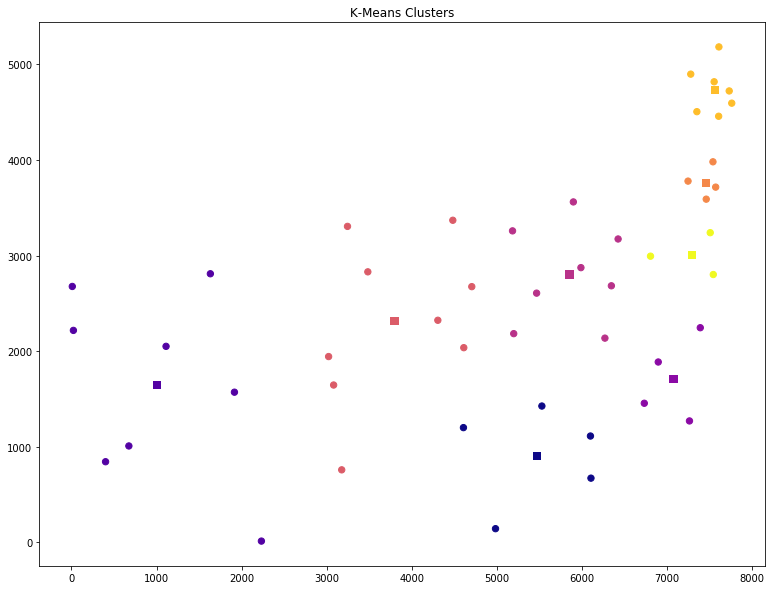

In [7]:
data = loadFromTSP('data/att48.tsp')  
centroids, labels = vq.kmeans2(data, 8, minit='points')
scatterplotOfClusters(data, centroids, labels)

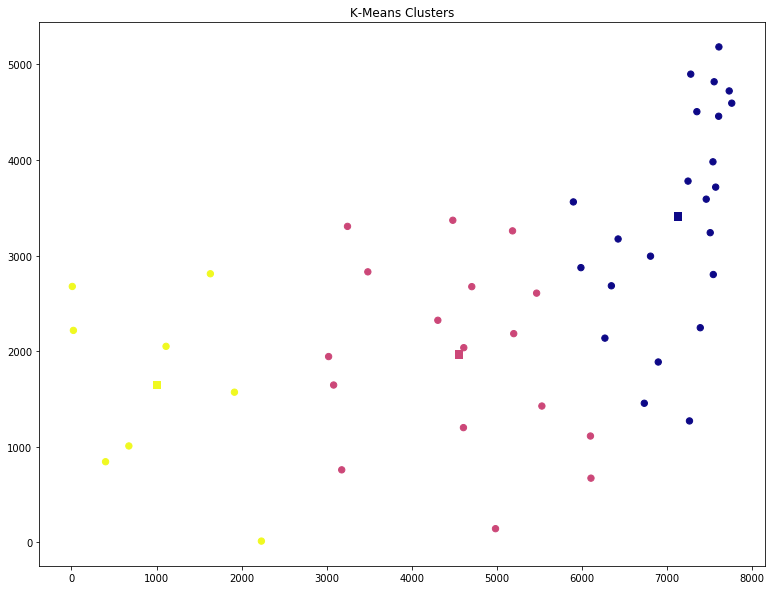

In [8]:
data = loadFromTSP('data/att48.tsp')  
centroids, labels = vq.kmeans2(data, 3, minit='points')
scatterplotOfClusters(data, centroids, labels)

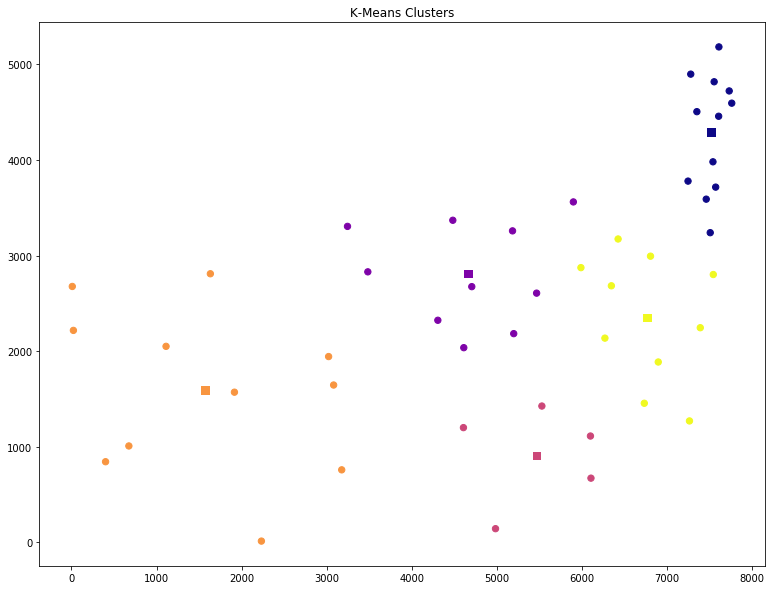

In [9]:
data = loadFromTSP('data/att48.tsp')  
centroids, labels = vq.kmeans2(data, 5, minit='points')
scatterplotOfClusters(data, centroids, labels)

In [10]:
def avgWithinSS(data, centroids, labels):
    k = len(centroids)
    res = 0.0
    for c in range(k):
        flags = labels == c
        pointsInC = data[flags]
        def d2(p):
            delta = p - centroids[c]
            return sum(delta*delta)
        dists = np.apply_along_axis(d2, axis=1, arr=pointsInC)
        res += sum(dists) / len(pointsInC)
    return res / k

In [11]:
def avgWithinSSOverK(data, kmax):
    def f(k):
        return vq.kmeans2(data, k, minit='points')
    return [avgWithinSS(data, *f(k)) for k in range(1, kmax+1)]

In [12]:
def plotWithinSS(avgWithinSS, **kwargs):
    fig, axes = plt.subplots(figsize=(13,10))
    plt.plot(avgWithinSS, 'go-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Average within-cluster sum of squares")
    plt.show()

C:\Users\Walther\Anaconda3\lib\site-packages\scipy\cluster\vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


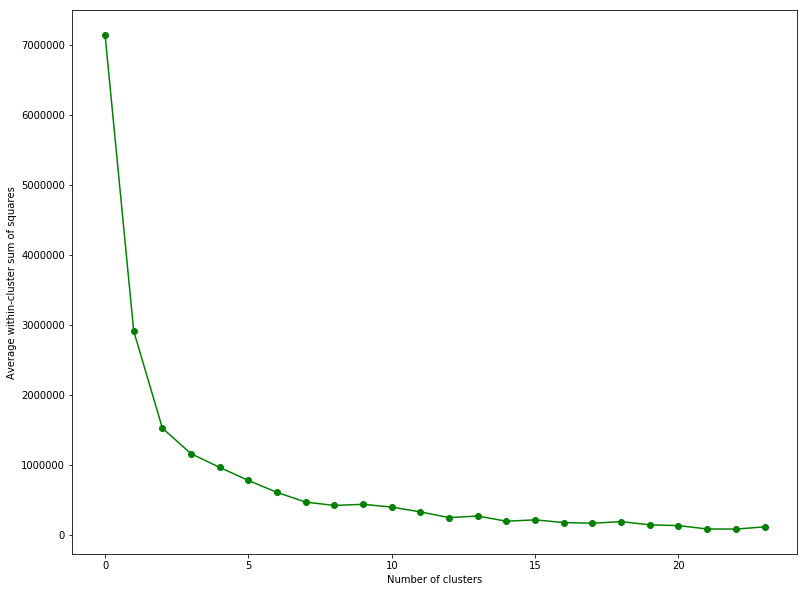

In [13]:
data=loadFromTSP("data/att48.tsp")
plotWithinSS(avgWithinSSOverK(data, 24))

In [14]:
def plotMultipleRuns(data, k, bins=20, nbrRuns=200, **kwargs):
    fig, axes = plt.subplots(figsize=(13,10))
    run =[]
    for j in range(nbrRuns):
        centroids, labels = vq.kmeans2(data, k, minit='points')
        run.append(avgWithinSS(data,centroids,labels))
    plt.hist(run, bins, facecolor='green', histtype='bar', edgecolor='black')
    plt.title("k={}; nbrRuns={}".format(k,nbrRuns))
    plt.show()


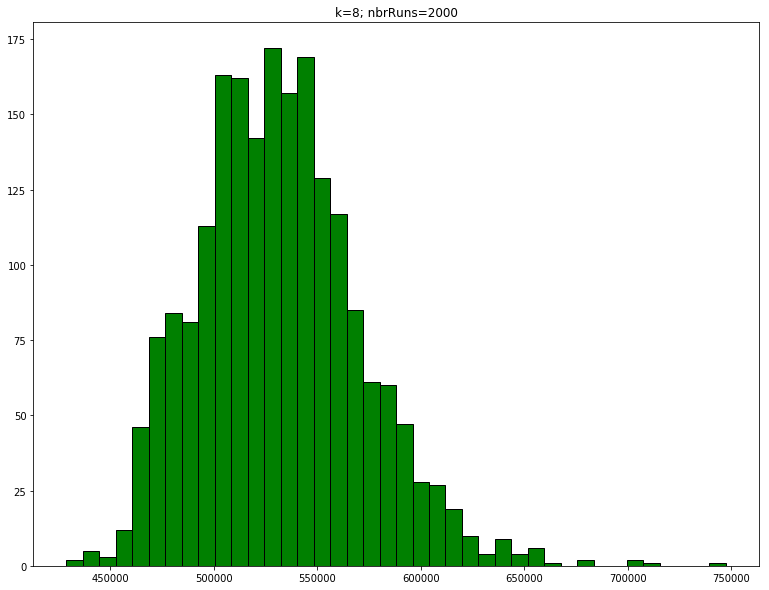

In [15]:
plotMultipleRuns(data, 8, 40, 2000, facecolor='green')